In [1]:
#Load packages
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

csvpath = "../InputData/GamingStudy_data.csv"
health_df_complete = pd.read_csv(csvpath, encoding = 'latin1')

health_df_complete.head()

,S. No.,Timestamp,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,...,Birthplace,Residence,Reference,Playstyle,accept,GAD_T,SWL_T,SPIN_T,Residence_ISO3,Birthplace_ISO3
0,1,42052.00437,0,0,0,0,1,0,0,Not difficult at all,...,USA,USA,Reddit,Singleplayer,Accept,1,23,5.0,USA,USA
1,2,42052.00680,1,2,2,2,0,1,0,Somewhat difficult,...,USA,USA,Reddit,Multiplayer - online - with strangers,Accept,8,16,33.0,USA,USA
2,3,42052.03860,0,2,2,0,0,3,1,Not difficult at all,...,Germany,Germany,Reddit,Singleplayer,Accept,8,17,31.0,DEU,DEU
3,4,42052.06804,0,0,0,0,0,0,0,Not difficult at all,...,USA,USA,Reddit,Multiplayer - online - with online acquaintanc...,Accept,0,17,11.0,USA,USA
4,5,42052.08948,2,1,2,2,2,3,2,Very difficult,...,USA,South Korea,Reddit,Multiplayer - online - with strangers,Accept,14,14,13.0,KOR,USA


In [2]:
#get info from dataset
health_df_complete.columns

Index(['S. No.', 'Timestamp', 'GAD1', 'GAD2', 'GAD3', 'GAD4', 'GAD5', 'GAD6',
       'GAD7', 'GADE', 'SWL1', 'SWL2', 'SWL3', 'SWL4', 'SWL5', 'Game',
       'Platform', 'Hours', 'earnings', 'whyplay', 'League', 'highestleague',
       'streams', 'SPIN1', 'SPIN2', 'SPIN3', 'SPIN4', 'SPIN5', 'SPIN6',
       'SPIN7', 'SPIN8', 'SPIN9', 'SPIN10', 'SPIN11', 'SPIN12', 'SPIN13',
       'SPIN14', 'SPIN15', 'SPIN16', 'SPIN17', 'Narcissism', 'Gender', 'Age',
       'Work', 'Degree', 'Birthplace', 'Residence', 'Reference', 'Playstyle',
       'accept', 'GAD_T', 'SWL_T', 'SPIN_T', 'Residence_ISO3',
       'Birthplace_ISO3'],
      dtype='object')

In [3]:
health_df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13464 entries, 0 to 13463
Data columns (total 55 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   S. No.           13464 non-null  int64  
 1   Timestamp        13464 non-null  float64
 2   GAD1             13464 non-null  int64  
 3   GAD2             13464 non-null  int64  
 4   GAD3             13464 non-null  int64  
 5   GAD4             13464 non-null  int64  
 6   GAD5             13464 non-null  int64  
 7   GAD6             13464 non-null  int64  
 8   GAD7             13464 non-null  int64  
 9   GADE             12815 non-null  object 
 10  SWL1             13464 non-null  int64  
 11  SWL2             13464 non-null  int64  
 12  SWL3             13464 non-null  int64  
 13  SWL4             13464 non-null  int64  
 14  SWL5             13464 non-null  int64  
 15  Game             13464 non-null  object 
 16  Platform         13464 non-null  object 
 17  Hours       

In [4]:
del health_df_complete["highestleague"]

In [5]:
#new data frame with only columns I want to keep
#GAD: General Anxiety Disorder
#SWL: Satisfaction with Life
#SPIN: Social Phobia Inventory
health_df = health_df_complete[["Game","Hours","Gender", "Age", "Work", "Degree", "Narcissism","Residence", "GADE", "GAD_T", "SWL_T", "SPIN_T"]]
health_df.head()


,Game,Hours,Gender,Age,Work,Degree,Narcissism,Residence,GADE,GAD_T,SWL_T,SPIN_T
0,Skyrim,15.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),1.0,USA,Not difficult at all,1,23,5.0
1,Other,8.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),1.0,USA,Somewhat difficult,8,16,33.0
2,Other,0.0,Female,32,Employed,Bachelor (or equivalent),4.0,Germany,Not difficult at all,8,17,31.0
3,Other,20.0,Male,28,Employed,Bachelor (or equivalent),2.0,USA,Not difficult at all,0,17,11.0
4,Other,20.0,Male,19,Employed,High school diploma (or equivalent),1.0,South Korea,Very difficult,14,14,13.0


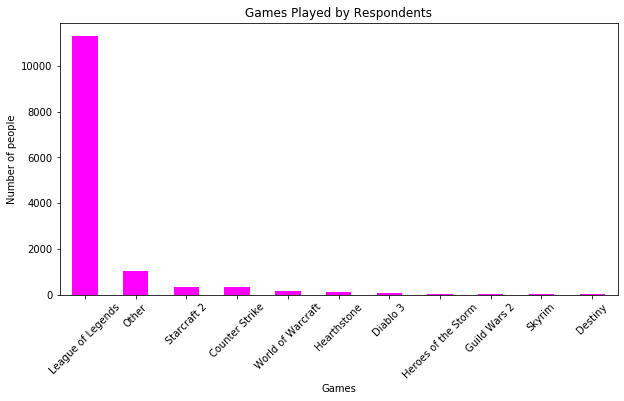

In [14]:
games=health_df["Game"].value_counts()
games_bar= games.plot(kind="bar", color="fuchsia", figsize=(10,5), rot=45)
games_bar.set_ylabel("Number of people")
games_bar.set_xlabel("Games")
games_bar.set_title("Games Played by Respondents")
plt.show()

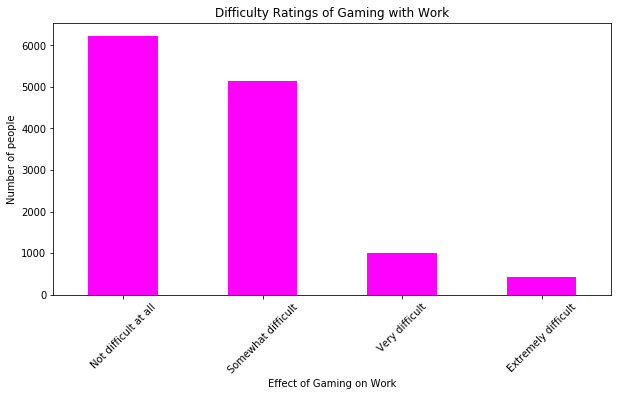

In [15]:
difficulty= health_df["GADE"].value_counts()
difficulty_bar= difficulty.plot(kind="bar", color="fuchsia", figsize=(10,5), rot=45)
difficulty_bar.set_ylabel("Number of people")
difficulty_bar.set_xlabel("Effect of Gaming on Work")
difficulty_bar.set_title("Difficulty Ratings of Gaming with Work")
plt.show()

In [16]:
unknown= health_df.loc[health_df["Residence"]=="Unknown"]
unknown

,Game,Hours,Gender,Age,Work,Degree,Narcissism,Residence,GADE,GAD_T,SWL_T,SPIN_T
173,League of Legends,7.0,Male,19,Student at college / university,None,2.0,Unknown,Not difficult at all,5,18,9.0
354,Starcraft 2,14.0,Male,35,Employed,Master (or equivalent),3.0,Unknown,Not difficult at all,2,32,4.0
437,League of Legends,40.0,Male,24,Employed,High school diploma (or equivalent),2.0,Unknown,Not difficult at all,0,17,18.0
682,League of Legends,17.0,Male,20,Unemployed / between jobs,None,1.0,Unknown,Not difficult at all,16,6,5.0
751,League of Legends,35.0,Male,18,Student at school,High school diploma (or equivalent),1.0,Unknown,Not difficult at all,5,16,17.0
...,...,...,...,...,...,...,...,...,...,...,...,...
12961,League of Legends,11.0,Male,22,Student at college / university,High school diploma (or equivalent),1.0,Unknown,Not difficult at all,7,11,20.0
13111,League of Legends,30.0,Male,19,Student at college / university,None,4.0,Unknown,Somewhat difficult,4,13,21.0
13181,League of Legends,15.0,Male,18,Student at college / university,High school diploma (or equivalent),2.0,Unknown,Not difficult at all,16,15,33.0
13279,League of Legends,150.0,Male,18,Student at school,High school diploma (or equivalent),4.0,Unknown,Extremely difficult,3,16,NaN


In [17]:
residence_df=health_df.drop(unknown.index)

In [18]:
places_count = residence_df.groupby(["Residence"]).count()["Game"]
places_count= places_count.sort_values(ascending=False)
places_count.head(25)

Residence
USA            4569
Germany        1413
UK             1032
Canada          994
Netherlands     506
France          391
Sweden          379
Denmark         254
Brazil          253
Australia       245
Poland          243
Portugal        229
Spain           203
Norway          193
Belgium         189
Finland         183
Austria         149
Italy           126
Argentina       104
Greece          103
Switzerland      96
Romania          91
Mexico           76
Ireland          72
Croatia          70
Name: Game, dtype: int64

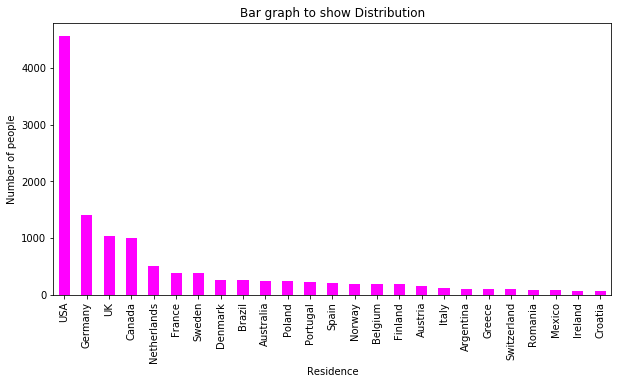

In [21]:
#bar graph of top 25 places that responded
places_bar= places_count.head(25).plot(kind="bar", color="fuchsia", figsize=(10,5))
places_bar.set_ylabel("Number of people")
places_bar.set_title("Bar graph to show Distribution")
plt.show()

In [8]:
#Drop all NA 
VG_health_df = health_df.dropna(how='any')

VG_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12122 entries, 0 to 13463
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        12122 non-null  object 
 1   Hours       12122 non-null  float64
 2   Gender      12122 non-null  object 
 3   Age         12122 non-null  int64  
 4   Work        12122 non-null  object 
 5   Degree      12122 non-null  object 
 6   Narcissism  12122 non-null  float64
 7   Residence   12122 non-null  object 
 8   GADE        12122 non-null  object 
 9   GAD_T       12122 non-null  int64  
 10  SWL_T       12122 non-null  int64  
 11  SPIN_T      12122 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.2+ MB


In [9]:
#show any with hours played per week over the amount of hours in a week
df = VG_health_df.loc[VG_health_df["Hours"]> 168]
df


,Game,Hours,Gender,Age,Work,Degree,Narcissism,Residence,GADE,GAD_T,SWL_T,SPIN_T
3860,League of Legends,8000.0,Other,18,Unemployed / between jobs,"Ph.D., Psy. D., MD (or equivalent)",5.0,Unknown,Very difficult,2,12,68.0
9435,Other,420.0,Other,42,Employed,"Ph.D., Psy. D., MD (or equivalent)",1.0,Unknown,Not difficult at all,0,5,0.0


In [10]:
#drop any with hours played per week over the amount of hours in a week
cleanedVG_health_df=VG_health_df.drop(df.index)

cleanedVG_health_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12120 entries, 0 to 13463
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Game        12120 non-null  object 
 1   Hours       12120 non-null  float64
 2   Gender      12120 non-null  object 
 3   Age         12120 non-null  int64  
 4   Work        12120 non-null  object 
 5   Degree      12120 non-null  object 
 6   Narcissism  12120 non-null  float64
 7   Residence   12120 non-null  object 
 8   GADE        12120 non-null  object 
 9   GAD_T       12120 non-null  int64  
 10  SWL_T       12120 non-null  int64  
 11  SPIN_T      12120 non-null  float64
dtypes: float64(3), int64(3), object(6)
memory usage: 1.2+ MB


In [ ]:
#find outliers data
hours= (cleanedVG_health_df["Hours"])

quartiles= hours.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
median = quartiles[0.5]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(lower_bound)
print(median)
print(upper_bound)

In [ ]:
#create boxplot to illustrate quartiles

red_circle = dict(markerfacecolor='fuchsia', marker='o', markersize = 5, markeredgecolor='black')
medianprops = dict(color='purple')
meanpointprops = dict(marker='D', markeredgecolor='purple',
                      markerfacecolor='purple')

plt.figure(figsize=(5,8))
plt.boxplot(hours, showmeans=True, meanprops=meanpointprops, medianprops=medianprops, flierprops=red_circle)
plt.ylabel("Hours Spent Gaming per Week")

plt.show()

In [ ]:
#graph of distribution by 

hours_count= cleanedVG_health_df.groupby(["Hours"]).count()["Game"]
hours_bar= hours_count.plot(kind="bar", color="fuchsia", figsize=(10,5))
hours_bar.set_xticks([])
hours_bar.set_ylabel("Number of people")
hours_bar.set_title("Bar graph to show Distribution")
plt.show()

In [ ]:
#make dataframe with all outliers
df2 = VG_health_df.loc[VG_health_df["Hours"]> 52]
df2

In [ ]:
#cleaned dataframe with all outliers dropped

dropVG_health_df=VG_health_df.drop(df2.index)

dropVG_health_df.info()

In [ ]:
#create all my variables
hours1= (cleanedVG_health_df["Hours"])
GAD1=(cleanedVG_health_df["GAD_T"])
narcissism1=(cleanedVG_health_df["Narcissism"])
SWL1=(cleanedVG_health_df["SWL_T"])
SPIN1=(cleanedVG_health_df["SPIN_T"])

In [ ]:
#graph scatterplots
slope, yint, r, p, _= linregress(hours1, GAD1)
regression = slope*(hours1)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours1, GAD1, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on GAD")
plt.title("Hours Spent gaming vs. Generalized Anxiety Disorder Measure Score")
plt.plot(hours1, regression, color='firebrick')

plt.show()

In [ ]:
slope, yint, r, p, _= linregress(hours1, narcissism1)
regression = slope*(hours1)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours1, narcissism1, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on Narcissism")
plt.title("Hours Spent gaming vs. Narcissism Measure Score")
plt.plot(hours1, regression, color='firebrick')

plt.show()

In [ ]:
slope, yint, r, p, _= linregress(hours1, SWL1)
regression = slope*(hours1)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours1, SWL1, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on SWL")
plt.title("Hours Spent gaming vs. Satisfaction with Life Measure")

plt.plot(hours1, regression, color='firebrick')

plt.show()

In [ ]:
slope, yint, r, p, _= linregress(hours1, SPIN1)
regression = slope*(hours1)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours1, SPIN1, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on SPIN")
plt.title("Hours spent gaming vs. Social Phobia Inventory")
plt.plot(hours1, regression, color='firebrick')
plt.show()

In [ ]:
#declare second round of variables with outliers removed
hours2= (dropVG_health_df["Hours"])
GAD2=(dropVG_health_df["GAD_T"])
narcissism2=(dropVG_health_df["Narcissism"])
SWL2=(dropVG_health_df["SWL_T"])
SPIN2=(dropVG_health_df["SPIN_T"])

In [ ]:
slope, yint, r, p, _= linregress(hours2, GAD2)
regression = slope*(hours2)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours2, GAD2, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on GAD")
plt.title("Hours Spent gaming vs. Generalized Anxiety Disorder Measure Score")
plt.plot(hours2, regression, color='firebrick')

plt.show()

In [ ]:
slope, yint, r, p, _= linregress(hours2, narcissism2)
regression = slope*(hours2)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours2, narcissism2, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on Narcissism Measure")
plt.title("Hours Spent gaming vs. Narcissism Measure Score")
plt.plot(hours2, regression, color='firebrick')

plt.show()

In [ ]:
slope, yint, r, p, _= linregress(hours2, SWL2)
regression = slope*(hours2)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours2, SWL2, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on SWL")
plt.title("Hours Spent gaming vs. Satisfaction with Life Measure")
plt.plot(hours2, regression, color='firebrick')

plt.show()

In [ ]:
slope, yint, r, p, _= linregress(hours2, SPIN2)
regression = slope*(hours2)+ yint

print(f"The r-value is: {round(r,2)}")
print(f"The p-value is: {round(p,2)}")

plt.figure(figsize=(10,5))
plt.scatter(hours2, SPIN2, color="lightcoral")
plt.xlabel("Hours spent gaming per week")
plt.ylabel("Score on SPIN")
plt.title("Hours spent gaming vs. Social Phobia Inventory")
plt.plot(hours2, regression, color='firebrick')

plt.show()

# Conclusions
We hypothesized that gaming would have a detrimental effect on mental health.  Analysis conducted found there was no relationship between hours spent gaming and mental health and therefore the null hypothesis was supported.  In this data, people were asked using a reddit forum to respond to this survey and the researchers collected 13,464 responses across 108 countries. Generalized anxiety was measured using the General Anxiety Disorder-7 (GAD-7), narcissism was measured using a 5-scale narcissism rating,  life satisfaction was measured using the Satisfaction with Life Scale (SWL), and social phobia was measured using the Social Phobia Inventory.  Several outliers were found and data was analyzed with outliers included and removed.  Pearsons R correlations were conducted and found no relationship between hours spent gaming and any of the measures given as all r-values were minimal.  The level at which people found difficulty playing games and doing work was also measured and most answered "Not difficult at all" and secondmost people answered "Somewhat difficult" indication that while game-life balance may be a concern for some, for most it is not detrimental to their life.